In [1]:
# import lib
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import threading
np.random.seed(78)
tf.set_random_seed(678)

In [8]:
# declare
num_epoch    = 1000000
ground_truth = np.random.uniform(0,1,10)
expected     = np.zeros(10)
pull_count   = np.zeros(10) 
print(ground_truth)
print(expected)
print(pull_count)

[0.90626164 0.02255411 0.87551925 0.11565788 0.09965873 0.92431365
 0.88146685 0.12355341 0.18428255 0.04542723]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# train 
for iter in range(num_epoch):
    current_action = np.random.randint(10)
    pull_count[current_action] = pull_count[current_action] + 1
    if np.random.uniform(0,1) < ground_truth[current_action]: current_reward = 1
    else: current_reward = 0
    expected[current_action] = expected[current_action] + (1/pull_count[current_action]) * (current_reward-expected[current_action])
    
print(np.around(ground_truth,3))
print(np.around(expected,3))
print(np.around(pull_count,3))

[0.906 0.023 0.876 0.116 0.1   0.924 0.881 0.124 0.184 0.045]
[0.904 0.023 0.876 0.114 0.098 0.924 0.882 0.124 0.186 0.045]
[ 99894. 100048.  99708. 100042. 100219.  99885.  99606. 100124. 100277.
 100197.]


In [10]:
# multi threaded
expected     = np.zeros(10)
pull_count   = np.zeros(10) 
print(ground_truth)
print(expected)
print(pull_count)

def findvalue():
    global expected,pull_count
    for iter in range(num_epoch//2):
        current_action = np.random.randint(10)
        pull_count[current_action] = pull_count[current_action] + 1
        if np.random.uniform(0,1) < ground_truth[current_action]: current_reward = 1
        else: current_reward = 0
        expected[current_action] = expected[current_action] + (1/pull_count[current_action]) * (current_reward-expected[current_action])
  
jobs = []
for i in range(0, 2):
    thread = threading.Thread(target=findvalue())
    jobs.append(thread)

for x in jobs:
    x.start()

for x in jobs:
    x.join()

print(np.around(ground_truth,3))
print(np.around(expected,3))
print(np.around(pull_count,3))

[0.90626164 0.02255411 0.87551925 0.11565788 0.09965873 0.92431365
 0.88146685 0.12355341 0.18428255 0.04542723]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.906 0.023 0.876 0.116 0.1   0.924 0.881 0.124 0.184 0.045]
[0.906 0.022 0.875 0.115 0.099 0.922 0.882 0.124 0.184 0.045]
[ 99787. 100324. 100545.  99759.  99898.  99667.  99909. 100175. 100262.
  99674.]


In [21]:
# vectorized
expected     = np.zeros(10)
pull_count   = np.zeros(10) 
print(ground_truth)
print(expected)
print(pull_count)

for iter in range(num_epoch//10):
    pull_count = pull_count + 1
    current_reward = np.random.uniform(0,1) < ground_truth
    expected = expected + (1/pull_count) * (current_reward-expected)
    
print(np.around(ground_truth,3))
print(np.around(expected,3))
print(np.around(pull_count,3))

[0.90626164 0.02255411 0.87551925 0.11565788 0.09965873 0.92431365
 0.88146685 0.12355341 0.18428255 0.04542723]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.906 0.023 0.876 0.116 0.1   0.924 0.881 0.124 0.184 0.045]
[0.905 0.023 0.875 0.116 0.1   0.923 0.881 0.124 0.186 0.045]
[100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000.]


Running multi-armed bandits with N_bandits = 10 and agent epsilon = 0.1
[Experiment 1/100]
  N_episodes = 10000
  bandit choice history = [10 10 10 ... 10  4  4]
  reward history = [1 1 1 ... 1 1 1]
  average reward = 0.769

reward history avg = [0.41 0.49 0.5  ... 0.69 0.8  0.78]


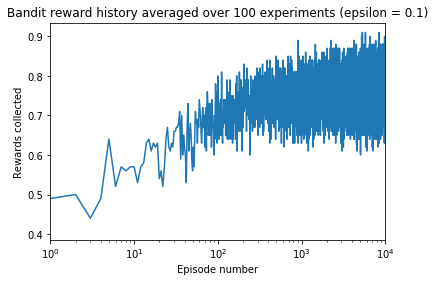

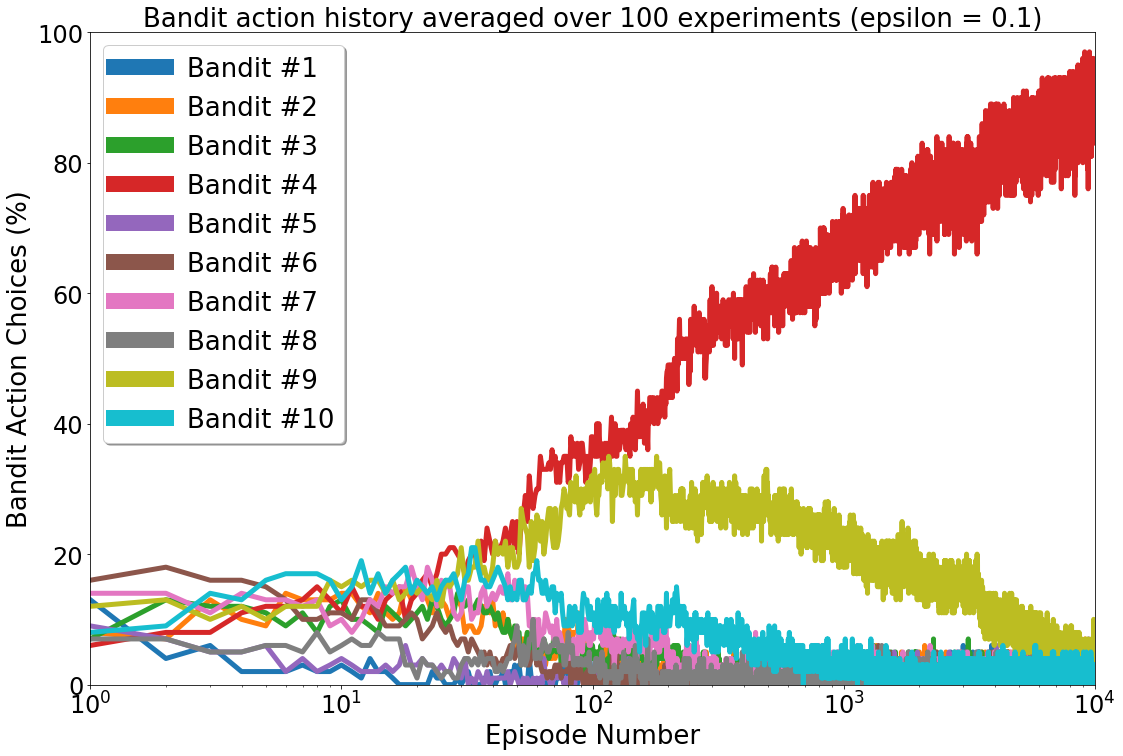

In [24]:
"""
 code: https://github.com/ankonzoid/LearningX/blob/master/classical_RL/MAB/MAB.py
 multiarmed_bandits.py  (author: Anson Wong / git: ankonzoid)
 We solve the multi-armed bandit problem using a classical epsilon-greedy
 agent with reward-average sampling to estimate the action-value Q.
 This algorithm follows closely with the notation of Sutton's RL textbook.
 We set up up bandits with a fixed probability distribution of success,
 and receive stochastic rewards from the bandits of +1 for success,
 and 0 reward for failure.
 The update rule for our action-values Q is:
   Q(a) <- Q(a) + 1/(k+1) * (R(a) - Q(a))
 where
   Q(a) = current value estimate of action "a"
   k = number of times action "a" was chosen so far
   R(a) = reward of sampling action bandit (bandit) "a"
 The derivation of the above Q incremental implementation update:
   Q(a;k+1)
   = 1/(k+1) * (R(a_1) + R(a_2) + ... + R(a_k) + R(a))
   = 1/(k+1) * (k*Q(a;k) + R(a))
   = 1/(k+1) * ((k+1)*Q(a;k) + R(a) - Q(a;k))
   = Q(a;k) + 1/(k+1) * (R(a) - Q(a;k))
"""

# =========================
# Settings
# =========================
bandit_probs = [0.10, 0.50, 0.60, 0.80, 0.10, 0.25, 0.60, 0.45, 0.75, 0.65]  
N_experiments = 100  # number of experiments to perform
N_episodes = 10000  # number of episodes per experiment
epsilon    = 0.1  # probability of random exploration (fraction)
save_fig   = False   # if false -> plot, if true save as file in same directory

# =========================
# Define Bandit and Agent class
# =========================
class Bandit:

    def __init__(self, bandit_probs):
        self.N = len(bandit_probs)  # number of bandits
        self.prob = bandit_probs  # success probabilities for each bandit

    # Get reward (1 for success, 0 for failure)
    def get_reward(self, action):
        rand = np.random.random()  # [0.0,1.0)
        reward = 1 if (rand < self.prob[action]) else 0
        return reward

class Agent:

    def __init__(self, bandit, epsilon):
        self.epsilon = epsilon
        self.k = np.zeros(bandit.N, dtype=np.int)  # number of times action was chosen
        self.Q = np.zeros(bandit.N, dtype=np.float)  # estimated value

    # Update Q action-value using:
    # Q(a) <- Q(a) + 1/(k+1) * (r(a) - Q(a))
    def update_Q(self, action, reward):
        self.k[action] += 1  # update action counter k -> k+1
        self.Q[action] += (1./self.k[action]) * (reward - self.Q[action])

    # Choose action using an epsilon-greedy agent
    def get_action(self, bandit, force_explore=False):
        rand = np.random.random()  # [0.0,1.0)
        if (rand < self.epsilon) or force_explore:
            action_explore = np.random.randint(bandit.N)  # explore random bandit
            return action_explore
        else:
            #action_greedy = np.argmax(self.Q)  # exploit best current bandit
            action_greedy = np.random.choice(np.flatnonzero(self.Q == self.Q.max()))
            return action_greedy

# =========================
# Define an experiment
# =========================
def experiment(agent, bandit, N_episodes):
    action_history = []
    reward_history = []
    for episode in range(N_episodes):
        action = agent.get_action(bandit) # Choose action from agent (from current Q estimate)
        reward = bandit.get_reward(action)# Pick up reward from bandit for chosen action
        agent.update_Q(action, reward)    # Update Q action-value estimates
        action_history.append(action)     # Append to history
        reward_history.append(reward)
    return (np.array(action_history), np.array(reward_history))

# =========================
# Start multi-armed bandit simulation
# =========================
N_bandits = len(bandit_probs)
print("Running multi-armed bandits with N_bandits = {} and agent epsilon = {}".format(N_bandits, epsilon))
reward_history_avg = np.zeros(N_episodes)  # reward history experiment-averaged
action_history_sum = np.zeros((N_episodes, N_bandits))  # sum action history
for i in range(N_experiments):
    bandit = Bandit(bandit_probs)  # initialize bandits
    agent  = Agent(bandit, epsilon)  # initialize agent
    (action_history, reward_history) = experiment(agent, bandit, N_episodes)  # perform experiment

    if i % 100 == 0:
        print("[Experiment {}/{}]".format(i + 1, N_experiments))
        print("  N_episodes = {}".format(N_episodes))
        print("  bandit choice history = {}".format(action_history + 1))
        print("  reward history = {}".format(reward_history))
        print("  average reward = {}".format(np.sum(reward_history) / len(reward_history)))
        print("")
    # Sum up experiment reward (later to be divided to represent an average)
    reward_history_avg += reward_history
    # Sum up action history
    for j, (a) in enumerate(action_history):
        action_history_sum[j][a] += 1

reward_history_avg /= np.float(N_experiments)
print("reward history avg = {}".format(reward_history_avg))

# =========================
# Plot reward history results
# =========================
plt.plot(reward_history_avg)
plt.xlabel("Episode number")
plt.ylabel("Rewards collected".format(N_experiments))
plt.title("Bandit reward history averaged over {} experiments (epsilon = {})".format(N_experiments, epsilon))
ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
plt.xlim([1, N_episodes])
if save_fig:
    output_file = "output/rewards.png"
    plt.savefig(output_file, bbox_inches="tight")
else: plt.show()

# =========================
# Plot action history results
# =========================
plt.figure(figsize=(18, 12))
for i in range(N_bandits):
    action_history_sum_plot = 100 * action_history_sum[:,i] / N_experiments
    plt.plot(list(np.array(range(len(action_history_sum_plot)))+1),action_history_sum_plot,linewidth=5.0,label="Bandit #{}".format(i+1))
plt.title("Bandit action history averaged over {} experiments (epsilon = {})".format(N_experiments, epsilon), fontsize=26)
plt.xlabel("Episode Number", fontsize=26)
plt.ylabel("Bandit Action Choices (%)", fontsize=26)
leg = plt.legend(loc='upper left', shadow=True, fontsize=26)
ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
plt.xlim([1, N_episodes])
plt.ylim([0, 100])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for legobj in leg.legendHandles:
    legobj.set_linewidth(16.0)
if save_fig:
    output_file = "output/actions.png"
    plt.savefig(output_file, bbox_inches="tight")
else:
    plt.show()

# Reference 
1. Solving the Multi-Armed Bandit Problem – Towards Data Science. (2017). Towards Data Science. Retrieved 24 December 2018, from https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c
2. Parallelising Python with Threading and Multiprocessing | QuantStart. (2018). Quantstart.com. Retrieved 25 December 2018, from https://www.quantstart.com/articles/Parallelising-Python-with-Threading-and-Multiprocessing
3. profile, V. (2014). Python Multiprocessing global variables. Korznikov.com. Retrieved 25 December 2018, from http://www.korznikov.com/2014/07/python-multiprocessing-global-variables.html
4. Python Tutorial - 28. Sharing Data Between Processes Using Array and Value. (2018). YouTube. Retrieved 25 December 2018, from https://www.youtube.com/watch?v=uWbSc84he2Q
5. Solving the Multi-Armed Bandit Problem – Towards Data Science. (2017). Towards Data Science. Retrieved 25 December 2018, from https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c